In [110]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [111]:
aal = pd.read_csv("AAL.csv")
dis = pd.read_csv("DIS.csv")
pep = pd.read_csv("PEP.csv")

In [112]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,CMO_252,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252
0,2010-01-04,4.562868,4.657142,4.393175,4.496876,9837300,0.0,0,-1.446312,4.866371,...,NaN,0.263968,0.296964,6.603778,0.263968,0.245113,5.450736,0.263968,0.360374,8.013879
1,2010-01-05,4.515732,5.062522,4.440312,5.005957,25212000,0.0,0,11.320767,5.856243,...,-7.191102,0.622209,0.329960,6.591340,0.622209,0.255588,5.105672,0.622209,0.361235,7.216095
2,2010-01-06,4.892829,5.071950,4.713708,4.798555,16597900,0.0,0,-4.143108,6.147385,...,-5.942541,0.358242,0.349757,7.288804,0.358242,0.257264,5.361276,0.358242,0.358616,7.473415
3,2010-01-07,4.770272,5.119086,4.760845,4.939965,14033400,0.0,0,2.946936,5.043731,...,-7.891070,0.358241,0.328074,6.641222,0.358241,0.258730,5.237491,0.358241,0.357007,7.226919
4,2010-01-08,4.968247,5.119085,4.770271,4.845690,12760000,0.0,0,-1.908414,5.088172,...,-7.613001,0.348814,0.332788,6.867707,0.348814,0.262501,5.417210,0.348814,0.354463,7.315023


In [113]:
aal['Hl_pct'] = 100*(aal['High']-aal['Low'])/aal['Close']
aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Hl_pct,pct_change
0,2010-01-04,4.496876,9837300,0.0,0,-1.446312,4.866371,4.511461,6.823274,1.604342,...,0.296964,6.603778,0.263968,0.245113,5.450736,0.263968,0.360374,8.013879,5.870025,-1.446284
1,2010-01-05,5.005957,25212000,0.0,0,11.320767,5.856243,4.760809,6.860207,0.311568,...,0.329960,6.591340,0.622209,0.255588,5.105672,0.622209,0.361235,7.216095,12.429376,10.855950
2,2010-01-06,4.798555,16597900,0.0,0,-4.143108,6.147385,4.746507,6.843106,0.054552,...,0.349757,7.288804,0.358242,0.257264,5.361276,0.358242,0.358616,7.473415,7.465621,-1.926780
3,2010-01-07,4.939965,14033400,0.0,0,2.946936,5.043731,4.658922,6.845602,0.400120,...,0.328074,6.641222,0.358241,0.258730,5.237491,0.358241,0.357007,7.226919,7.251902,3.557309
4,2010-01-08,4.845690,12760000,0.0,0,-1.908414,5.088172,4.684184,6.838192,0.288173,...,0.332788,6.867707,0.348814,0.262501,5.417210,0.348814,0.354463,7.315023,7.198442,-2.466795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2021-07-02,21.480000,20814100,0.0,0,-0.139473,1.525176,2.137848,3.586904,0.750008,...,0.558000,2.597764,0.539999,0.768889,3.579557,0.539999,0.873810,4.068015,2.513962,-0.647555
2895,2021-07-06,21.010000,24176500,0.0,0,-2.188079,1.573314,2.142391,3.587733,-0.202186,...,0.587000,2.793907,0.930000,0.771778,3.673383,0.930000,0.874683,4.163172,4.426465,-2.279069
2896,2021-07-07,20.309999,30857000,0.0,0,-3.331750,1.776203,2.190119,3.565914,0.335898,...,0.615000,3.028064,0.879999,0.777778,3.829531,0.879999,0.874643,4.306464,4.332837,-2.308809
2897,2021-07-08,20.350000,28539300,0.0,0,0.196952,1.761107,2.163158,3.565828,-0.856102,...,0.687000,3.375920,0.980000,0.776222,3.814359,0.980000,0.875952,4.304434,4.815722,2.364191


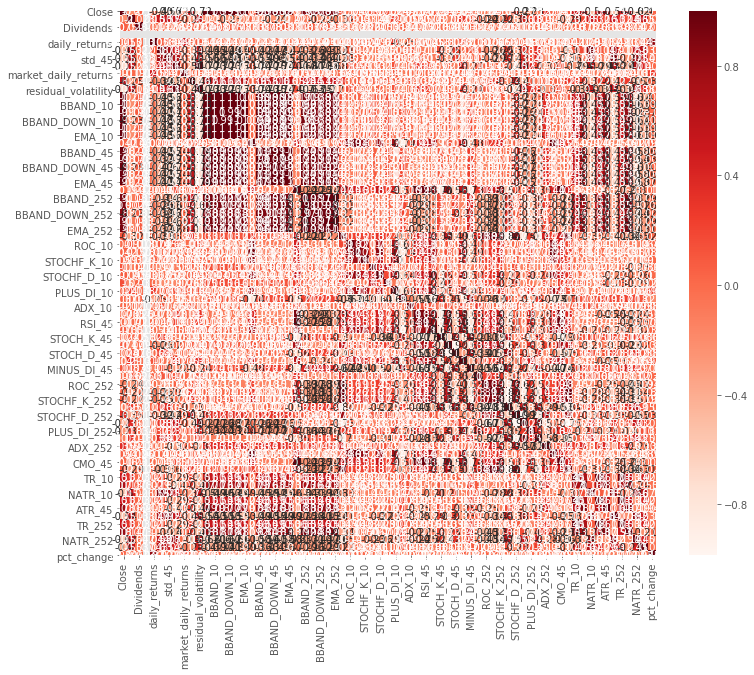

In [114]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [115]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [116]:
aal_df = aal1[rel_feat["sel_col"]]
aal_df['Date']=aal1['Date']

C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
print(len(aal1.columns), len(rel_feat))

72 37


In [118]:
aal_df.columns

Index(['Close', 'Volume', 'std_10', 'std_45', 'std_252', 'beta',
       'residual_volatility', 'Typical Price', 'BBAND_10', 'BBAND_UP_10',
       'BBAND_DOWN_10', 'SMA_10', 'EMA_10', 'BBAND_45', 'BBAND_UP_45',
       'BBAND_DOWN_45', 'SMA_45', 'EMA_45', 'BBAND_252', 'BBAND_UP_252',
       'BBAND_DOWN_252', 'SMA_252', 'EMA_252', 'STOCHF_D_252', 'STOCH_D_252',
       'PLUS_DI_252', 'ADX_252', 'TR_10', 'ATR_10', 'NATR_10', 'TR_45',
       'ATR_45', 'NATR_45', 'TR_252', 'ATR_252', 'NATR_252', 'Hl_pct', 'Date'],
      dtype='object')

In [119]:
aal_close_px = aal_df['Close']

In [120]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


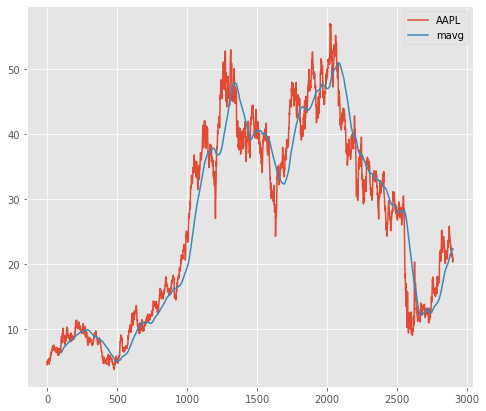

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

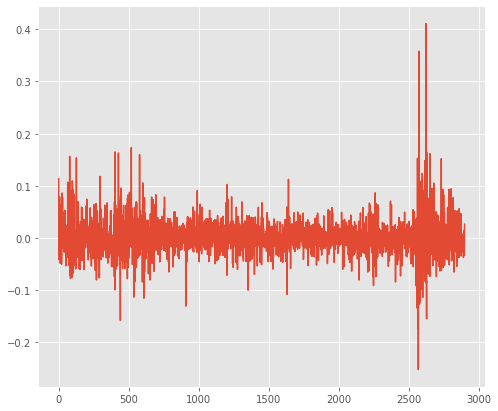

In [122]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [123]:
aal_df['prev_day'] = aal_df['Close'].shift(1)


C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
aal_df

,Close,Volume,std_10,std_45,std_252,beta,residual_volatility,Typical Price,BBAND_10,BBAND_UP_10,...,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Hl_pct,Date,prev_day
0,4.496876,9837300,4.866371,4.511461,6.823274,0.744240,6.339225,4.600579,4.634517,5.128931,...,6.603778,0.263968,0.245113,5.450736,0.263968,0.360374,8.013879,5.870025,2010-01-04,NaN
1,5.005957,25212000,5.856243,4.760809,6.860207,0.745731,6.378324,4.515731,4.708051,5.180151,...,6.591340,0.622209,0.255588,5.105672,0.622209,0.361235,7.216095,12.429376,2010-01-05,4.496876
2,4.798555,16597900,6.147385,4.746507,6.843106,0.743966,6.361757,4.836264,4.754245,5.148853,...,7.288804,0.358242,0.257264,5.361276,0.358242,0.358616,7.473415,7.465621,2010-01-06,5.005957
3,4.939965,14033400,5.043731,4.658922,6.845602,0.764389,6.363961,4.861404,4.764616,5.173977,...,6.641222,0.358241,0.258730,5.237491,0.358241,0.357007,7.226919,7.251902,2010-01-07,4.798555
4,4.845690,12760000,5.088172,4.684184,6.838192,0.763664,6.356495,4.939965,4.761787,5.168171,...,6.867707,0.348814,0.262501,5.417210,0.348814,0.354463,7.315023,7.198442,2010-01-08,4.939965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,21.480000,20814100,1.525176,2.137848,3.586904,1.131294,3.453385,21.543334,21.800000,22.828181,...,2.597764,0.539999,0.768889,3.579557,0.539999,0.873810,4.068015,2.513962,2021-07-02,21.510000
2895,21.010000,24176500,1.573314,2.142391,3.587733,1.140285,3.455562,21.413333,21.656000,22.682935,...,2.793907,0.930000,0.771778,3.673383,0.930000,0.874683,4.163172,4.426465,2021-07-06,21.480000
2896,20.309999,30857000,1.776203,2.190119,3.565914,1.107873,3.438408,21.220001,21.476000,22.750440,...,3.028064,0.879999,0.777778,3.829531,0.879999,0.874643,4.306464,4.332837,2021-07-07,21.010000
2897,20.350000,28539300,1.761107,2.163158,3.565828,1.101588,3.438427,20.510000,21.291000,22.633616,...,3.375920,0.980000,0.776222,3.814359,0.980000,0.875952,4.304434,4.815722,2021-07-08,20.309999


In [125]:
aal_df = aal_df.set_index("Date")

In [126]:
aal_df.index = pd.to_datetime(aal_df.index)
aal_df.index[0]

Timestamp('2010-01-04 00:00:00')

In [127]:
# training test split
key = pd.Timestamp(2016, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [128]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [129]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [130]:
# model generation
xtrain.fillna(value=-99999, inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [131]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [132]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [133]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.9846401198546973
The quadratic regression 2 confidence is  0.7693254883353531
The quadratic regression 3 confidence is  -3.837253405839938
The knn regression confidence is  -7.323388934141345


In [134]:
forecast_set = clfreg.predict(xtest)
aal_df['Forecast'] = np.nan

In [135]:
forecast_set
aal_df['Forecast']

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2021-07-02   NaN
2021-07-06   NaN
2021-07-07   NaN
2021-07-08   NaN
2021-07-09   NaN
Name: Forecast, Length: 2899, dtype: float64

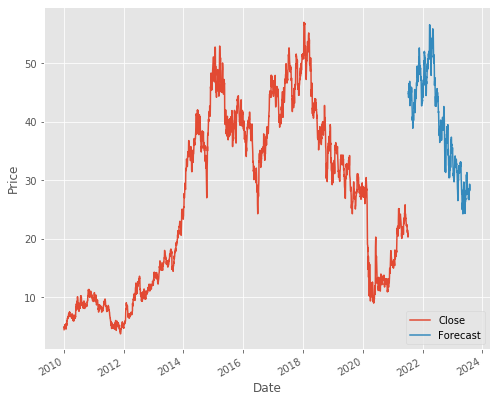

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2023-07-30    29.337225
2023-07-31    29.280259
2023-08-01    29.216010
2023-08-02    28.820894
2023-08-03    28.354219
Name: Forecast, Length: 3654, dtype: float64

In [136]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = aal_df.iloc[-1].name
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    aal_df.loc[next_date] = [np.nan for _ in range(len(aal_df.columns)-1)]+[i]
aal_df['Close'].plot()
aal_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [137]:
print(next_unix)

2023-08-04 00:00:00


In [141]:
print(clfreg.coef_)

[ 3.11704676e-01 -5.94310351e-02 -6.16556774e-02  3.20929994e-01
 -5.94310393e-02  4.98616465e-03  6.43822960e-02  4.48057638e-09
 -1.59406732e-01 -2.26541177e+00 -1.66269943e-06  9.87652024e-02
 -3.32141727e-06 -7.90192241e-03  7.75392757e-02  3.69628325e-01
  7.41226124e-01 -2.30978629e-01  4.98616450e-03  1.14513602e+00
  6.43822960e-02 -9.29392646e-03  7.57791766e-02 -5.14997099e-02
  3.45279159e-01  3.45279159e-01 -3.04781285e-01  7.81366729e-02
  6.57613837e-02  3.68647220e-01  3.99739931e-06 -1.83949227e+00
 -5.94310392e-02  5.29854154e-02  1.24491950e+00  1.92662554e-02
 -2.67062377e-01]


In [139]:
print(clfreg.intercept_)

-0.646910807254109


In [146]:
xtrain.columns

Index(['EMA_45', 'TR_45', 'ADX_252', 'BBAND_UP_10', 'TR_252', 'BBAND_45',
       'SMA_252', 'Volume', 'NATR_10', 'ATR_252', 'prev_day', 'std_45',
       'STOCH_D_252', 'Hl_pct', 'NATR_252', 'BBAND_DOWN_10', 'ATR_10',
       'NATR_45', 'SMA_45', 'Typical Price', 'BBAND_252', 'BBAND_DOWN_45',
       'BBAND_UP_252', 'beta', 'SMA_10', 'BBAND_10', 'std_252', 'PLUS_DI_252',
       'std_10', 'residual_volatility', 'STOCHF_D_252', 'EMA_10', 'TR_10',
       'BBAND_DOWN_252', 'ATR_45', 'BBAND_UP_45', 'EMA_252'],
      dtype='object')

In [148]:
coeff = dict(zip(xtrain.columns, clfreg.coef_))


In [149]:
coeff

{'EMA_45': 0.31170467614788916,
 'TR_45': -0.05943103513413447,
 'ADX_252': -0.061655677431988264,
 'BBAND_UP_10': 0.3209299942607264,
 'TR_252': -0.05943103926562475,
 'BBAND_45': 0.004986164645593168,
 'SMA_252': 0.06438229596878375,
 'Volume': 4.480576382887836e-09,
 'NATR_10': -0.15940673211039066,
 'ATR_252': -2.2654117660838446,
 'prev_day': -1.6626994329148755e-06,
 'std_45': 0.09876520235448222,
 'STOCH_D_252': -3.3214172713038677e-06,
 'Hl_pct': -0.00790192240765407,
 'NATR_252': 0.07753927565781783,
 'BBAND_DOWN_10': 0.369628324674064,
 'ATR_10': 0.7412261240608262,
 'NATR_45': -0.23097862920072745,
 'SMA_45': 0.0049861644958648695,
 'Typical Price': 1.1451360206431036,
 'BBAND_252': 0.0643822959629899,
 'BBAND_DOWN_45': -0.00929392645620053,
 'BBAND_UP_252': 0.07577917656830026,
 'beta': -0.05149970986470338,
 'SMA_10': 0.34527915947986554,
 'BBAND_10': 0.34527915947986526,
 'std_252': -0.30478128480875605,
 'PLUS_DI_252': 0.07813667288510201,
 'std_10': 0.06576138369954396,

In [150]:
dict(sorted(coeff.items(), key=lambda item: item[1]))

{'ATR_252': -2.2654117660838446,
 'EMA_10': -1.839492269341315,
 'std_252': -0.30478128480875605,
 'EMA_252': -0.2670623771373824,
 'NATR_45': -0.23097862920072745,
 'NATR_10': -0.15940673211039066,
 'ADX_252': -0.061655677431988264,
 'TR_252': -0.05943103926562475,
 'TR_10': -0.059431039248085085,
 'TR_45': -0.05943103513413447,
 'beta': -0.05149970986470338,
 'BBAND_DOWN_45': -0.00929392645620053,
 'Hl_pct': -0.00790192240765407,
 'STOCH_D_252': -3.3214172713038677e-06,
 'prev_day': -1.6626994329148755e-06,
 'Volume': 4.480576382887836e-09,
 'STOCHF_D_252': 3.997399309942868e-06,
 'SMA_45': 0.0049861644958648695,
 'BBAND_45': 0.004986164645593168,
 'BBAND_UP_45': 0.01926625544975187,
 'BBAND_DOWN_252': 0.052985415356983506,
 'BBAND_252': 0.0643822959629899,
 'SMA_252': 0.06438229596878375,
 'std_10': 0.06576138369954396,
 'BBAND_UP_252': 0.07577917656830026,
 'NATR_252': 0.07753927565781783,
 'PLUS_DI_252': 0.07813667288510201,
 'std_45': 0.09876520235448222,
 'EMA_45': 0.31170467614